## ２次元Ising模型についてlocal updateとwolffアルゴリズムの比較

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EnergyとMagnetization(L=40, T=5.00)

In [39]:
data_local = np.loadtxt('../output/2d_Ising/local_energy_mag_2025_2.49.dat')
data_wolff =  np.loadtxt('../output/2d_Ising/wolff_energy_mag_2_2.26.dat')

In [40]:
energy_local = data_local[:, 0]
energy_wolff = data_wolff[:, 0]
mag_local = data_local[:, 1]
mag_wolff = data_wolff[:, 1]

Text(0.5, 0.98, 'local update')

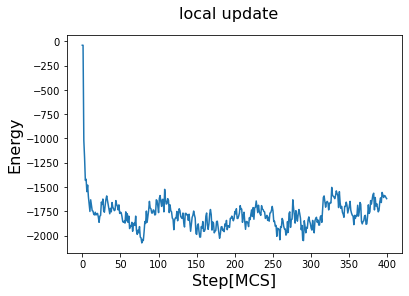

In [41]:
plt.plot(energy_local[:400])
plt.ylabel('Energy', fontsize=16)
plt.xlabel('Step[MCS]', fontsize=16)
plt.suptitle('local update', fontsize=16)

Text(0.5, 0.98, 'Wolff algorithm')

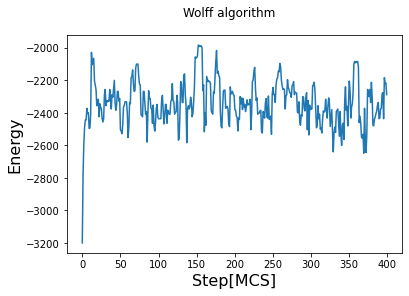

In [42]:
plt.plot(energy_wolff[:400])
plt.ylabel('Energy', fontsize=16)
plt.xlabel('Step[MCS]', fontsize=16)
plt.suptitle('Wolff algorithm')

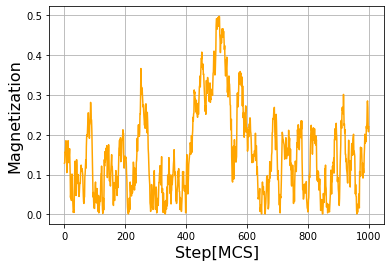

In [31]:
plt.plot(mag_local[:1000], color='orange')
plt.ylabel('Magnetization', fontsize=16)
plt.xlabel('Step[MCS]', fontsize=16)
plt.grid()

plt.plot(mag_wolff[:1000], color='orange')
plt.ylabel('Magnetization', fontsize=16)
plt.xlabel('Step[MCS]', fontsize=16)
plt.grid()

## 自己相関時間の比較

### local update

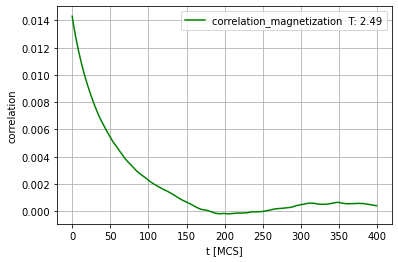

In [32]:
mag_ = mag_local[400:] 
C = np.zeros(3000)
sum2 = (np.mean(mag_))**2
for t in range(3000):
    sum1 = 0
    N = mag_.shape[0]
    for t_ in range(N-t):
        sum1 += mag_[t_] * mag_[t_ + t]
    C[t] = (sum1 / (N-t)) - sum2

plt.plot(C[:400], label="correlation_magnetization  T: 2.49", color='green')
plt.legend()
plt.xlabel('t [MCS]')
plt.ylabel('correlation')
plt.grid()
plt.show()

### wolff algorithm

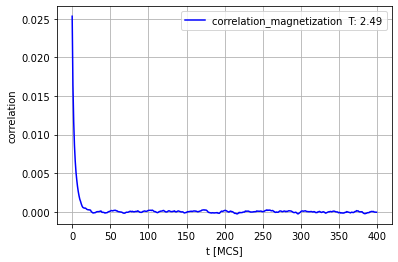

In [43]:
mag_wolff_ = mag_wolff[400:] 
C_wolff = np.zeros(500)
sum2 = (np.mean(mag_wolff_))**2
for t in range(500):
    sum1 = 0
    N = mag_wolff_.shape[0]
    for t_ in range(N-t):
        sum1 += mag_wolff_[t_] * mag_wolff_[t_ + t]
    C_wolff[t] = (sum1 / (N-t)) - sum2

plt.plot(C_wolff[:400], label="correlation_magnetization  T: 2.49", color='blue')
plt.legend()
plt.xlabel('t [MCS]')
plt.ylabel('correlation')
plt.grid()
plt.show()

In [34]:
C.shape

(3000,)

In [64]:
C_wolff

array([ 1.37306617e-03,  2.69198304e-05, -1.31837327e-05,  2.34077575e-06,
       -2.85416543e-05,  1.00067773e-05, -2.92768313e-07, -1.37190001e-06,
       -1.74354900e-05, -7.39424673e-06, -1.83970075e-05, -1.88015024e-05,
        2.13592797e-05, -5.29434726e-06, -1.82844710e-05,  6.75993689e-06,
       -7.78696705e-06, -9.61029198e-06,  2.31251330e-06, -2.07971216e-05,
        1.12230935e-05,  9.64955634e-06, -2.40208878e-05,  6.82270764e-06,
        4.65255269e-06,  1.56395129e-05, -3.97632338e-06, -3.61701672e-06,
        1.99378828e-06, -9.98688743e-06,  2.79109333e-06, -5.18648432e-06,
       -4.76114815e-06, -9.84545972e-07, -1.67394659e-05,  1.32997159e-06,
        1.31497568e-05, -8.58301681e-06,  1.89535586e-05,  1.27253369e-05,
       -1.52629929e-05,  1.28001245e-05,  2.11203820e-05,  4.48014328e-06,
       -1.50695823e-06, -5.68640346e-06,  1.20413089e-05,  6.38413205e-06,
       -2.23473149e-05, -2.12294463e-05, -2.50782039e-06, -9.92936144e-06,
        2.71590757e-05, -

In [48]:
data_local

array([[-4.0000e+01,  1.2875e-01],
       [-4.0000e+01,  1.3000e-01],
       [-1.0200e+03,  1.5625e-01],
       ...,
       [-1.8000e+03,  3.3000e-01],
       [-1.8240e+03,  3.5500e-01],
       [-1.8200e+03,  3.7000e-01]])

In [67]:
mag_wolff

array([0.12875, 0.1325 , 0.03   , ..., 0.10875, 0.145  , 0.00875])

In [68]:
mag_local

array([0.12875, 0.13   , 0.15625, ..., 0.33   , 0.355  , 0.37   ])